Comenzamos cargandos las librerias y los datasets a analizar

In [1]:
# Importamos las librerias necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cargamos los datasets
df_games_full = pd.read_csv("../data/processed/dataset_games_full.csv")
df_reviews = pd.read_csv("../data/processed/dataset_reviews.csv")
df_all = pd.read_csv("../data/processed/dataset_all.csv")

C:\Users\leoxl\AppData\Local\Temp\ipykernel_24768\962667771.py:10: DtypeWarning: Columns (22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv("../data/processed/dataset_all.csv")


Los datos los hemos obtenido de Kaggle, donde le usuario indica que la fuente el STEAMDB, la Base de datos oficial de Steam, por lo que estos datos son los oficiales publicados por la plataforma.

De esta plataforma obetenemos 4 archivos:
- games_metada.json : Contiene información dada por las empresas de la descripción del juego y de las etiquetas asociadas al juego.
- games.csv: Contiene información de compatibilidad, ventas y descuentos aportada por la plataforma (Steam)
- recomendations.csv: Reseñas dadas por los usuarios sobre el juego, y datos sobre las mismas reseñas, si ha sido útil, si gusta...
- users.csv: Obtiene los datos de los usuarios, con la cantidad de juegos de cada usuario y de las reseñas publicadas por el mismo.


Ahora, revisaremoss las primeras lineas de cada dataset para revisar la información que contiene cada uno.

In [2]:
print("Mostrando las primeras filas del dataset df_games_full, que contiene informacion sobre los juegos de Steam obtenida de el fichero games.csv y games_metadata.json")
df_games_full.head()

Mostrando las primeras filas del dataset df_games_full, que contiene informacion sobre los juegos de Steam obtenida de el fichero games.csv y games_metadata.json


,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,description,tags
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,Enter the dark underworld of Prince of Persia ...,"Action, Adventure, Parkour, Third Person, Grea..."
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True,NaN,NaN
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True,Monaco: What's Yours Is Mine is a single playe...,"Co-op, Stealth, Indie, Heist, Local Co-Op, Str..."
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True,Escape Dead Island is a Survival-Mystery adven...,"Zombies, Adventure, Survival, Action, Third Pe..."
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True,Dungeon of the Endless is a Rogue-Like Dungeon...,"Roguelike, Strategy, Tower Defense, Pixel Grap..."


In [3]:
print("Mostrando las primeras filas del dataset df_reviews, que contiene informacion sobre las reseñas de los juegos escritas por los usuarios, obtenidos de los ficheros recommendations.csv y users.csv")
df_reviews.head()

Mostrando las primeras filas del dataset df_reviews, que contiene informacion sobre las reseñas de los juegos escritas por los usuarios, obtenidos de los ficheros recommendations.csv y users.csv


,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id,products,reviews
0,975370,0,0,2022-12-12,True,36.3,51580,0,28,5
1,304390,4,0,2017-02-17,False,11.5,2586,1,269,1
2,1085660,2,0,2019-11-17,True,336.5,253880,2,237,2
3,703080,0,0,2022-09-23,True,27.4,259432,3,5,2
4,526870,0,0,2021-01-10,True,7.9,23869,4,13,2


In [4]:
print("Mostramos las primeras filas del dataset df_all, que contiene toda la información unificada")
df_all.head()

Mostramos las primeras filas del dataset df_all, que contiene toda la información unificada


,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id,products,reviews,...,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,description,tags
0,975370,0,0,2022-12-12,True,36.3,51580,0,28,5,...,False,Overwhelmingly Positive,95,19665,30.0,0.0,0.0,True,NaN,NaN
1,304390,4,0,2017-02-17,False,11.5,2586,1,269,1,...,False,Mixed,69,82277,15.0,0.0,0.0,True,NaN,NaN
2,1085660,2,0,2019-11-17,True,336.5,253880,2,237,2,...,False,Very Positive,81,562723,0.0,0.0,0.0,True,NaN,NaN
3,703080,0,0,2022-09-23,True,27.4,259432,3,5,2,...,False,Very Positive,90,60113,45.0,0.0,0.0,True,NaN,NaN
4,526870,0,0,2021-01-10,True,7.9,23869,4,13,2,...,False,Overwhelmingly Positive,97,119866,30.0,0.0,0.0,True,NaN,NaN


Gracias a esto, obtenemos la siguiente leyenda de datos de cada columna:

- app_id: (KEY_ID) Código identificativo de cada juego
- description: (STRING) Descripción aportada por la empresa sobre el su juego
- tags: (LIST) Etiquetas añadidas por la empresa para categorizar el tipo de juego
- title: (STRING) Titulo del juego
- date_release: (AAAA-MM-DD) Fecha de lanzamiento del Juego en Steam
- win: (BOOLEAN) Compatibilidad con Windows
- mac: (BOOLEAN) Compatibilidad con MAC
- linux: (BOOLEAN) Compatibilidad con Linux
- rating: (STRING) Idea general de las reseñas generadas por los usuarios sobre el juego
- positive_ratio: (INT) Puntuación media del juego según las reseñas
- user_reviews: (INT) Cantidad total de reseñas sobre el juego
- price_final: (FLOAT) Precio final (actual en el momento de extracción de los datos)
- price_original: (FLOAT) Precio original
- discount: (FLOAT) Descuento (actual en el momento de la extracción de los datos)
- steam_deck: (BOOLEAN) Compatibilidad con Steam Deck
- helpful: (INT) Indica la cantidad de personas que han encontrado la reseña útil
- funny: (INT) Indica la cantidad de personas que han encontrado la reseña divertida
- date: (AAAA-MM-DD) Fecha de la reseña
- is_recommended: (BOOLEAN) Indica si el jugador que publicó la reseña recomienda o no la reseña
- hours: (FLOAT) Cantidad de horas que se ha jugado antes de publicar la reseña
- user_id: (KEY_ID) Id del usuario que publicó al reseña
- review_id: (KEY_ID) Id de la reseña
- products: (INT) Cantidad de juegos en la biblioteca del usuario
- reviews: (INT) Cantidad de reseñas publicadas por el usuario

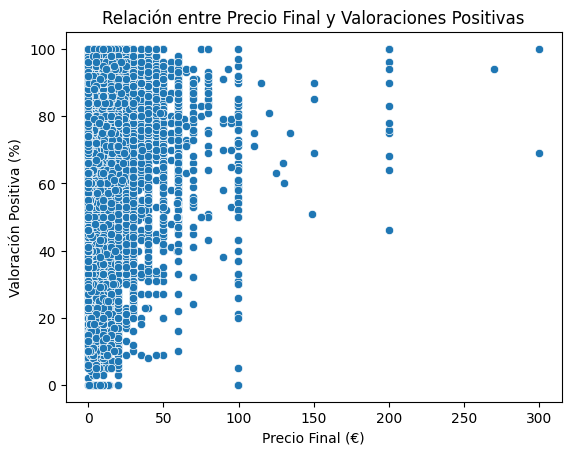

Correlación entre precio y valoraciones:
                 price_final  positive_ratio
price_final        1.000000       -0.009989
positive_ratio    -0.009989        1.000000


In [ ]:
# ¿Cual es la relación entre valoraciones positivas y precio?

# Scatter plot
sns.scatterplot(data=df_games_full, x="price_final", y="positive_ratio")
plt.title("Relación entre Precio Final y Valoraciones Positivas")
plt.xlabel("Precio Final (€)")
plt.ylabel("Valoración Positiva (%)")
plt.show()

# Correlación
corr = df_games_full[["price_final", "positive_ratio"]].corr()
print("Correlación entre precio y valoraciones:\n", corr)

Valoraciones promedio:
 has_discount
False    76.891031
True     78.539344
Name: positive_ratio, dtype: float64


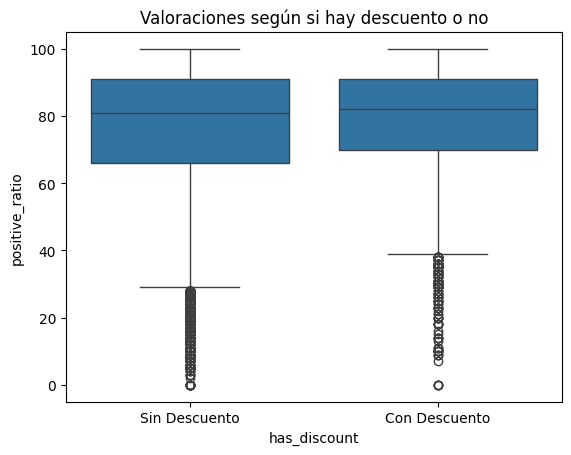

In [7]:
#ANÁLISIS 2: ¿Merece la pena esperar a un descuento?

df_games_full["has_discount"] = df_games_full["discount"] > 0

# Comparar valoraciones promedio
promedios = df_games_full.groupby("has_discount")["positive_ratio"].mean()
print("Valoraciones promedio:\n", promedios)

# Boxplot
sns.boxplot(data=df_games_full, x="has_discount", y="positive_ratio")
plt.title("Valoraciones según si hay descuento o no")
plt.xticks([0, 1], ['Sin Descuento', 'Con Descuento'])
plt.show()

In [ ]:
#ANÁLISIS 3: Credibilidad del usuario

# Creamos una métrica simple: helpful / (reseñas + 1)
df_all["user_credibility"] = df_all["helpful"] / (df_all["reviews"] + 1)

# Visualizar relación entre credibilidad y recomendaciones
sns.scatterplot(data=df_all, x="user_credibility", y="is_recommended", alpha=0.3)
plt.title("Relación entre credibilidad del usuario y recomendaciones")
plt.show()

# Agrupamos por usuario para ver tendencias
user_summary = df_all.groupby("user_id").agg({
    "user_credibility": "mean",
    "is_recommended": "mean",
    "reviews": "first",
    "products": "first",
    "helpful": "first"
}).reset_index()

print(user_summary.sort_values("user_credibility", ascending=False).head())